#시각화 연습
1. 준비 
    !pip install pandas
    !pip install seaborn
    !pip install jupyterlab
    !pip install scikit-learn
2. 주의사항
    -한 셀에 3개이상 겹치지 않기
    -선색상 원색 쓰기
3. 참고(버전)
    -python == 3.12.x
    -matplotlib == ...


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()
iris.data.shape

(150, 4)

In [ ]:
# 사이킷런 데이터 로드
iris = load_iris()
iris

# DataFrame 생성 (2차원 배열=표)
# "이 150x4짜리 숫자 데이터 배열을 가져다가, 각 열에 이 이름을 붙여서 테이블(표)로 만들어줘"
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris.keys()
# target_names 종속변인 : 꽃의 품종 (결과역할 - 독립변인 변화에 따라 달라짐)
# feature_names 독립변인 : 꽃 받침 길이,너비,꽃잎길이 ... (원인역할)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
iris = load_iris()
X = iris.data #입력데이터 독립변수
y = iris.target #품종 종속변수 
feature_names = iris.feature_names
target_names = iris.target_names

In [30]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
df = pd.DataFrame(X, columns = feature_names)
df["species"] = [str(iris.target_names[i]) for i in y]
df.head(3)
# df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [43]:
means = df.groupby("species").mean()
colors =["red", "blue", "green"]
species_list = iris.target_names

means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


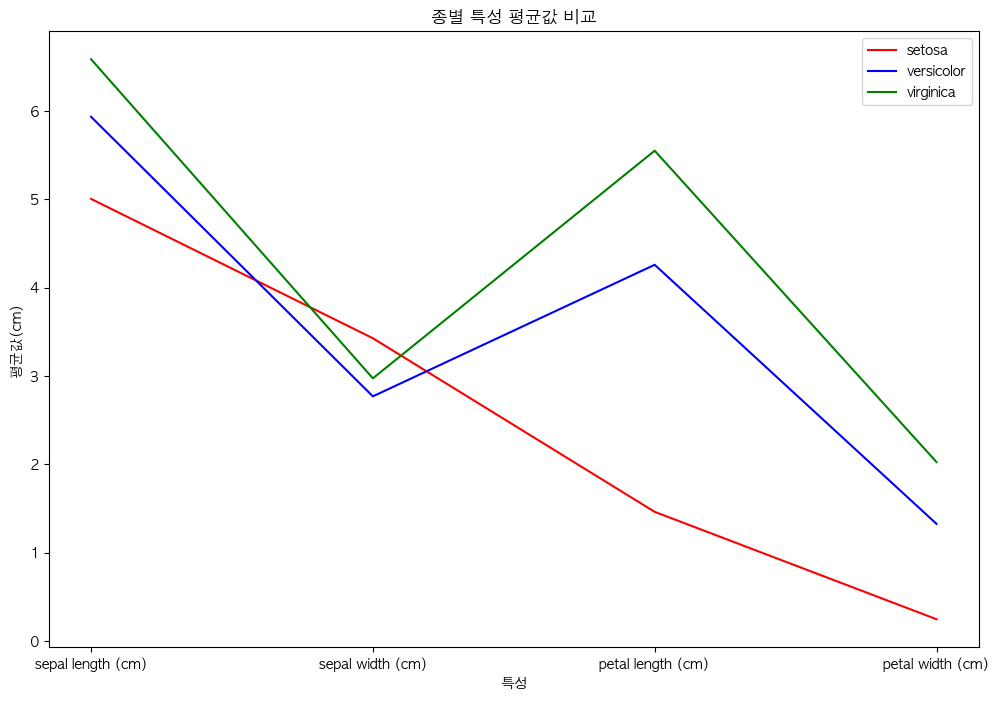

In [72]:
#그래프 전체 크기
plt.figure(figsize = (12,8)) 

# 직접그려보기
# plt.plot(X, y)
for i, species in enumerate(species_list):
    plt.plot(iris.feature_names, means.loc[species],
            color = colors[i], label= species)

plt.title("종별 특성 평균값 비교")
plt.xlabel("특성")
plt.ylabel("평균값(cm)")
plt.legend() #범례
plt.show()

In [65]:
# petal length (cm) 가 1.5보다 큰 데이터를 출력해보자!
# boolean data frame =>  필터링
df["petal length (cm)"] > 1.5
# 실제데이터
df_petal = df[df["petal length (cm)"] > 1.5] 

Text(0, 0.5, '관측 데이터')

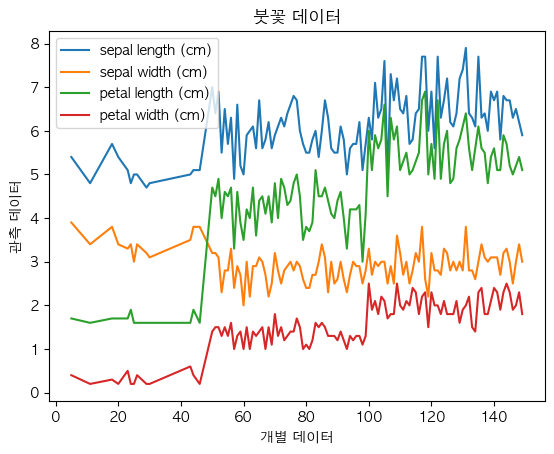

In [ ]:
ax = df_petal.plot()
ax.set_title("붓꽃 데이터")
ax.set_xlabel("개별 데이터")
ax.set_ylabel("관측 데이터")

In [71]:
# 한국어폰트(mac)
plt.rcParams["font.family"] = "AppleGothic"
# 윈도우 => "Malgun Gothic"

plt.rcParams["axes.unicode_minus"] = False

In [59]:
!pip install pandas

In [3]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 KB 6.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [50]:
!pip install jupyterlab

(100,)
10.0


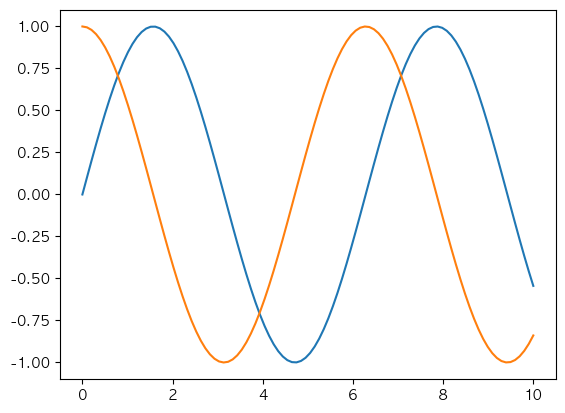

<Figure size 640x480 with 0 Axes>

In [75]:
x = np.linspace(0,10,100)
print(x.shape)
print(x[99]) 

# 한 셀에 작성하면 겹쳐 그림
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));
plt.show() #(배포시)py파일로 열때, plt.show 없으면 그래프 안뜸, but 쥬피터노트북에서는 안해도됨.
plt.savefig("sample.pdf")

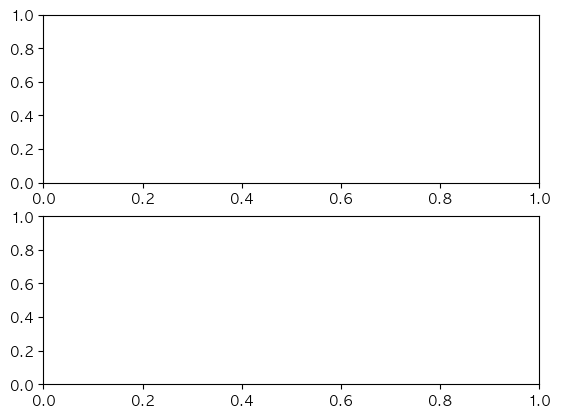

In [76]:
# fig(도화지) 하나 ax(그래프 공간) 둘
fig, ax = plt.subplots(2)

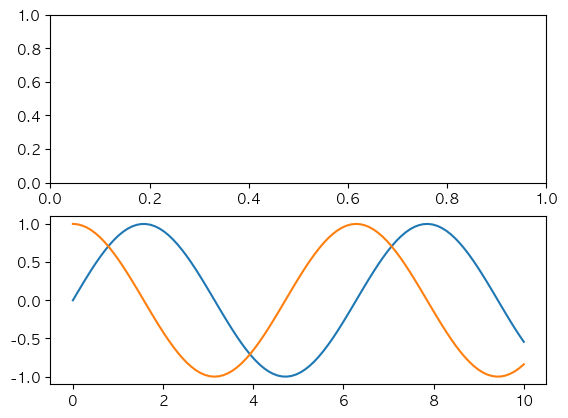

In [77]:
fig, ax = plt.subplots(2)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Text(0.5, 1.0, 'sin(x)')

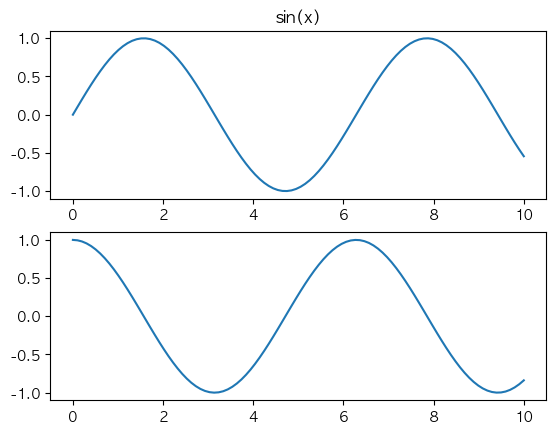

In [78]:
fig, ax = plt.subplots(2)
ax[0].plot(x, np.sin(x))
ax[0].set_title('sin(x)')

ax[1].plot(x, np.cos(x))
ax[0].set_title('sin(x)')

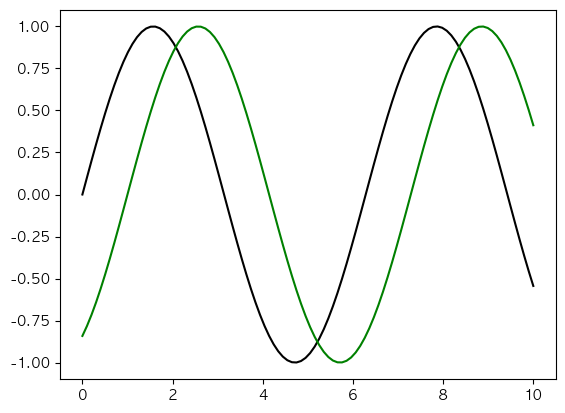

In [ ]:
# 색상
x = np.linspace(0,10,100)
# 오른쪽으로 a 만큼 이동
plt.plot(x, np.sin(x-0), color="black")
plt.plot(x, np.sin(x-1), color ="g")
# plt.plot(x, np.sin(x-2), color="0.75") #그라데이션
# plt.plot(x, np.sin(x-3), color="#FFDD44")
# plt.plot(x, np.sin(x-4), color=(1.0,0.2,0.3))
# plt.plot(x, np.sin(x-5), color="chartreuse");

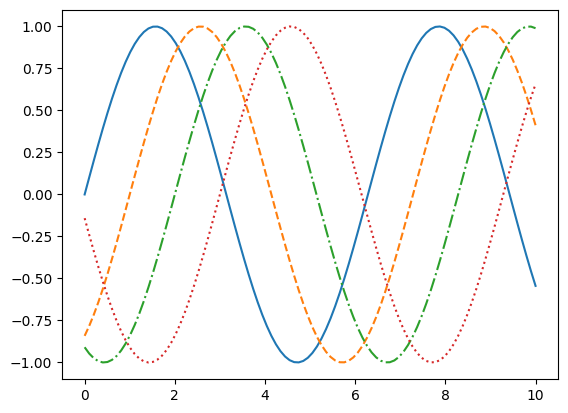

In [28]:
# 선스타일
x = np.linspace(0,10,100)
plt.plot(x, np.sin(x-0), linestyle="solid")
plt.plot(x, np.sin(x-1), linestyle="dashed")
plt.plot(x, np.sin(x-2), linestyle="dashdot")
plt.plot(x, np.sin(x-3), linestyle="dotted");

In [ ]:
# 선스타일
x = np.linspace(0,10,100)
plt.plot(x, np.sin(x-0), "-g")
plt.plot(x, np.sin(x-1), "- -c")
plt.plot(x, np.sin(x-2), "-.k")
plt.plot(x, np.sin(x-3), ":r");

Text(0, 0.5, '$sin(x)$')

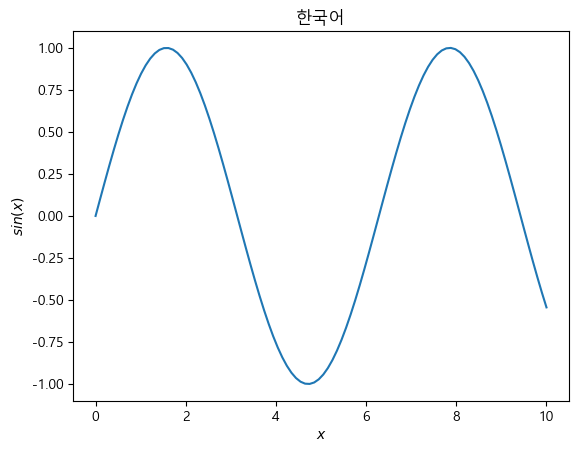

In [36]:
plt.plot(x, np.sin(x))
plt.title("한국어")
plt.xlabel("$x$")
plt.ylabel("$sin(x)$")
# plt.xlim(0, 10)
# plt.ylim(0, 0.4);